# states covid

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
## import packages

In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


### This is only the States worksheet from the covid data.

In [4]:
df = pd.read_excel ('C:/Users/nolan/OneDrive/Documents/GitHub/Projects/data/Community_Profile_Report_20210812_Public.xlsx', sheet_name='States', header = 1)
## import the data

In [5]:
df.head()
## view data

,State,State Abbreviation,FEMA region,Population,Population as a percent of national population,% Non-Hispanic White,Cases as a percent of national total - last 7 days,Cases - last 7 days,Cases per 100k - last 7 days,Deaths - last 7 days,...,People who are fully vaccinated as % of population - ages 18+,People with at least 1 dose - ages 65+,People with at least 1 dose as % of population - ages 65+,People who are fully vaccinated - ages 65+,People who are fully vaccinated as % of population - ages 65+,Flu vaccination rate confidence interval (2018-2019) - Ages 0-4,Flu vaccination rate confidence interval (2018-2019) - Ages 5-12,Flu vaccination rate confidence interval (2018-2019) - Ages 13-17,Flu vaccination rate confidence interval (2018-2019) - Ages 18-64,Flu vaccination rate confidence interval (2018-2019) - Ages 65+
0,Florida,FL,4,21477737.0,0.065,0.53,0.186,148471,691,341,...,0.598,4171424,0.928,3626756,0.806,61.8% ± 5.7%,56.1% ± 5.3%,45.1% ± 5.5%,28.4% ± 1.8%,61.1% ± 2.4%
1,Texas,TX,6,28995881.0,0.087,0.41,0.111,88641,306,446,...,0.560,3224302,0.863,2854859,0.765,72.6% ± 3.2%,63.9% ± 3%,51.9% ± 2.8%,37.7% ± 2.4%,67.5% ± 3.7%
2,California,CA,9,39512223.0,0.119,0.37,0.069,54920,139,79,...,0.650,5633679,0.965,4542596,0.778,77.1% ± 6%,66.6% ± 5.7%,49.9% ± 6.2%,36.8% ± 2.2%,69% ± 3.7%
3,Louisiana,LA,6,4648794.0,0.014,0.58,0.050,39622,852,279,...,0.480,614606,0.829,574999,0.776,68% ± 6%,54.4% ± 5.3%,49.6% ± 6.2%,30.7% ± 2.9%,64.3% ± 4.9%
4,Georgia,GA,4,10617423.0,0.032,0.52,0.048,38755,365,159,...,0.494,1267342,0.835,1103412,0.727,65.9% ± 4.8%,57.2% ± 3.8%,43.7% ± 5.8%,34.9% ± 4.9%,58.4% ± 7.6%


In [6]:
df.info(verbose = True)
## information about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 146 columns):
 #    Column                                                                                                        Dtype  
---   ------                                                                                                        -----  
 0    State                                                                                                         object 
 1    State Abbreviation                                                                                            object 
 2    FEMA region                                                                                                   int64  
 3    Population                                                                                                    float64
 4    Population as a percent of national population                                                                float64
 5    % Non-Hispanic White  

## Data Exploration

In [7]:
states = df[['State Abbreviation',
             'Population',
             'Cases - last 7 days',
             'Deaths - last 7 days',
             'Cumulative cases', 'Cumulative deaths',
             'Number of days of downward case trajectory',
             'Total RT-PCR diagnostic tests - last 7 days (may be an underestimate due to delayed reporting)',
             'Total RT-PCR diagnostic tests - previous 7 days (may be an underestimate due to delayed reporting)',
             'Viral (RT-PCR) lab test positivity rate - last 7 days (may be an underestimate due to delayed reporting)',
             'Viral (RT-PCR) lab test positivity rate - previous 7 days (may be an underestimate due to delayed reporting)',
             'Confirmed COVID-19 admissions - last 7 days',
             'Monoclonal antibody courses administered by hospitals - last 7 days',
             'Total ventilators among hospitals reporting - last 7 days',
             'Doses administered - last 7 days',
             'Doses distributed',
             'Doses administered',
             'People with at least 1 dose',
             'People who are fully vaccinated']]
## keeping columns to examine later

In [8]:
states.head()
## verify new data set

,State Abbreviation,Population,Cases - last 7 days,Deaths - last 7 days,Cumulative cases,Cumulative deaths,Number of days of downward case trajectory,Total RT-PCR diagnostic tests - last 7 days (may be an underestimate due to delayed reporting),Total RT-PCR diagnostic tests - previous 7 days (may be an underestimate due to delayed reporting),Viral (RT-PCR) lab test positivity rate - last 7 days (may be an underestimate due to delayed reporting),Viral (RT-PCR) lab test positivity rate - previous 7 days (may be an underestimate due to delayed reporting),Confirmed COVID-19 admissions - last 7 days,Monoclonal antibody courses administered by hospitals - last 7 days,Total ventilators among hospitals reporting - last 7 days,Doses administered - last 7 days,Doses distributed,Doses administered,People with at least 1 dose,People who are fully vaccinated
0,FL,21477737.0,148471,341,2827469,40528,0,574071,657603,0.200,0.191,15098,3158.0,10646,462007,27644275,23345223,12967103,10720783
1,TX,28995881.0,88641,446,3263283,52667,0,489791,444394,0.183,0.172,10399,920.0,17682,545501,34847795,28324847,15614051,13000265
2,CA,39512223.0,54920,79,4137738,63976,0,1093796,994250,0.064,0.068,5784,2138.0,16786,593601,52038625,46165206,26241900,21293344
3,LA,4648794.0,39622,279,601941,11408,0,169187,125671,0.157,0.165,2772,2890.0,3649,137634,4721240,3836597,2122432,1761790
4,GA,10617423.0,38755,159,1238383,21894,0,152393,122152,0.165,0.145,3738,1263.0,4509,128182,12126815,9208320,5103376,4183379


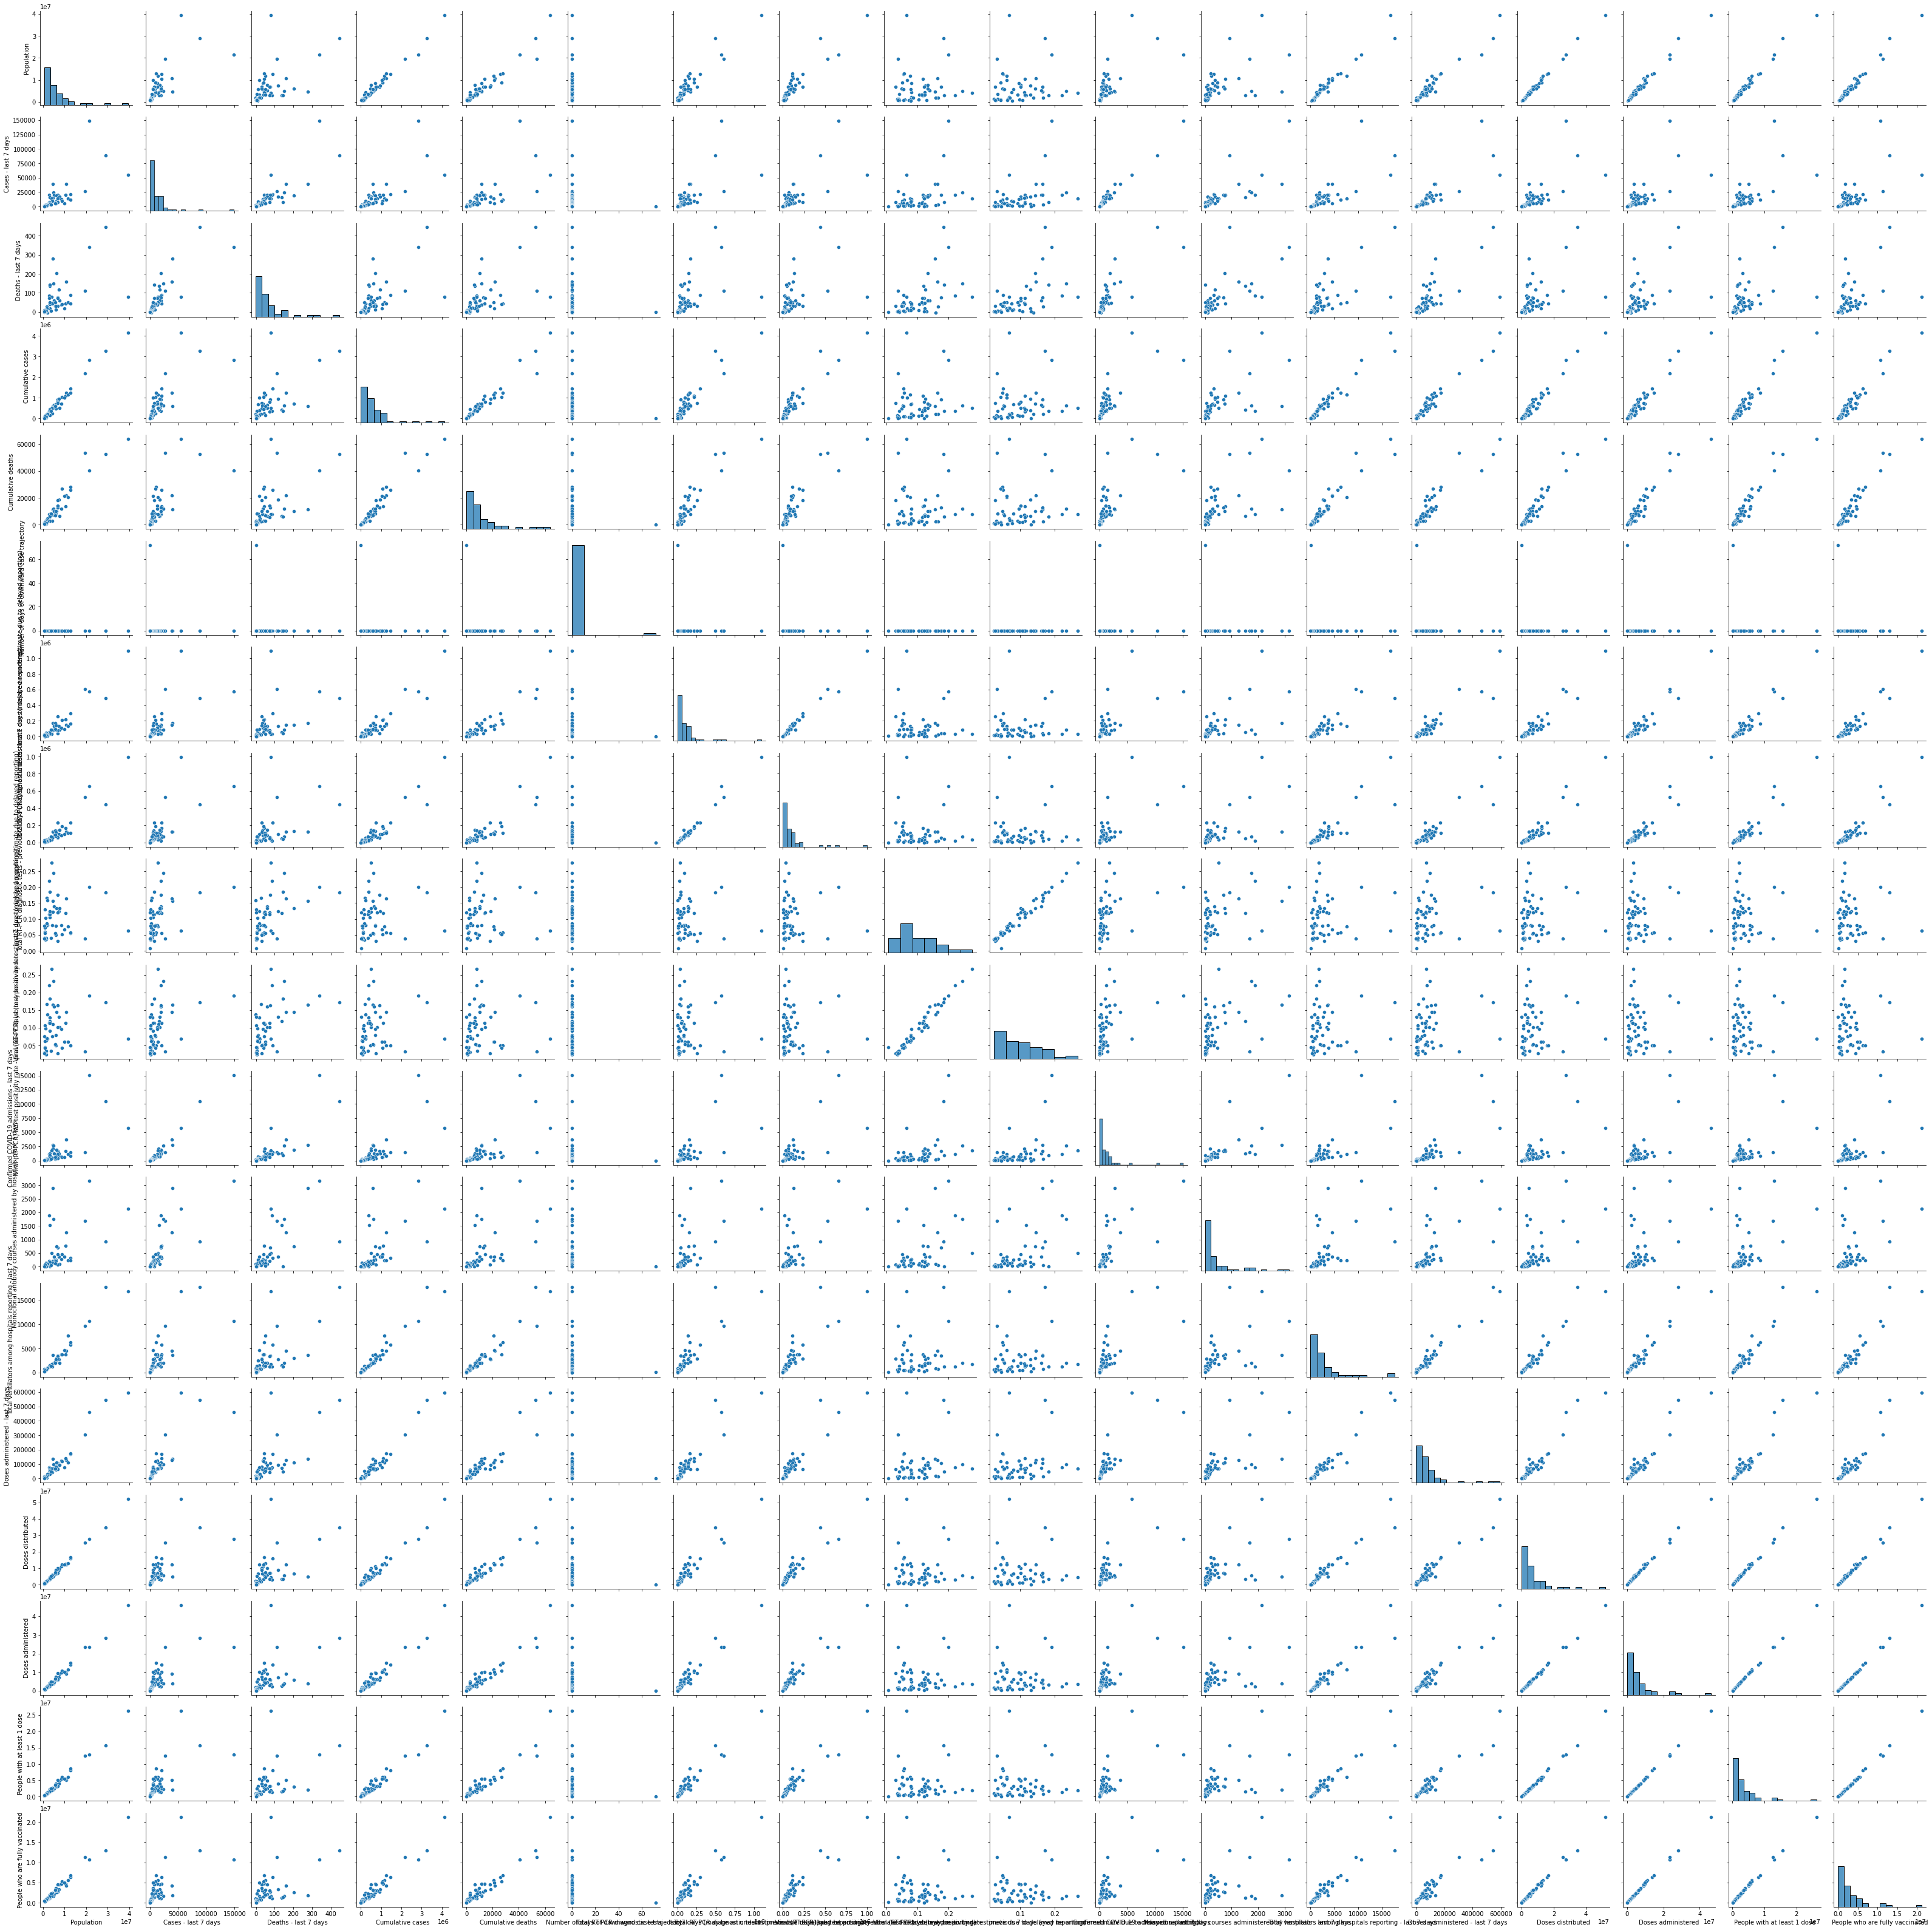

In [9]:
sns.pairplot(states)
## examine any pairwise relationships

## Examining states according to percentage of vaccinated population

In [10]:
data = states.copy()
## fresh copy of data

In [11]:
data['Vaccination % state by population'] = data['People who are fully vaccinated'] / data['Population']
## create column with state vaxxed count / state population as a percentage

In [12]:
data.head()
## verify column

,State Abbreviation,Population,Cases - last 7 days,Deaths - last 7 days,Cumulative cases,Cumulative deaths,Number of days of downward case trajectory,Total RT-PCR diagnostic tests - last 7 days (may be an underestimate due to delayed reporting),Total RT-PCR diagnostic tests - previous 7 days (may be an underestimate due to delayed reporting),Viral (RT-PCR) lab test positivity rate - last 7 days (may be an underestimate due to delayed reporting),Viral (RT-PCR) lab test positivity rate - previous 7 days (may be an underestimate due to delayed reporting),Confirmed COVID-19 admissions - last 7 days,Monoclonal antibody courses administered by hospitals - last 7 days,Total ventilators among hospitals reporting - last 7 days,Doses administered - last 7 days,Doses distributed,Doses administered,People with at least 1 dose,People who are fully vaccinated,Vaccination % state by population
0,FL,21477737.0,148471,341,2827469,40528,0,574071,657603,0.200,0.191,15098,3158.0,10646,462007,27644275,23345223,12967103,10720783,0.499158
1,TX,28995881.0,88641,446,3263283,52667,0,489791,444394,0.183,0.172,10399,920.0,17682,545501,34847795,28324847,15614051,13000265,0.448349
2,CA,39512223.0,54920,79,4137738,63976,0,1093796,994250,0.064,0.068,5784,2138.0,16786,593601,52038625,46165206,26241900,21293344,0.538905
3,LA,4648794.0,39622,279,601941,11408,0,169187,125671,0.157,0.165,2772,2890.0,3649,137634,4721240,3836597,2122432,1761790,0.378978
4,GA,10617423.0,38755,159,1238383,21894,0,152393,122152,0.165,0.145,3738,1263.0,4509,128182,12126815,9208320,5103376,4183379,0.394011


In [13]:
test = data[['State Abbreviation', 'Population', 'People who are fully vaccinated', 'Vaccination % state by population']]
## select columns to examine

In [14]:
test1 = test.groupby('Vaccination % state by population').max().reset_index()
## group by highest state vax percentage

In [15]:
test1.sort_values('Vaccination % state by population', ascending = False)
## sort into table

,Vaccination % state by population,State Abbreviation,Population,People who are fully vaccinated
51,0.667786,VT,623989.0,416691
50,0.645892,MA,6892503.0,4451811
49,0.644234,ME,1344212.0,865987
48,0.641310,CT,3565287.0,2286455
47,0.624417,RI,1059361.0,661483
46,0.609377,PR,3193694.0,1946164
45,0.597304,MD,6045680.0,3611110
44,0.593436,NJ,8882190.0,5271010
43,0.586761,NH,1359711.0,797825
42,0.585009,WA,7614893.0,4454780


__From this table we can see that at 66.77%, Vermont is the state/territory with the highest percentage of its respective population vaccinated. This is a large chunk of the country as Vermont's population is less than 640 million.__
__Alaska comes in last with 1.72 million vaccianated of its population of approximately just short of 410 million. This comes to 35.08% of Alaska, but what is it in the eyes of the entire U.S. population?__

Next, examine the state's vaccinated population as a percentage of the whole country.

In [16]:
data['Vaccination % state vs whole U.S. population'] = data['People who are fully vaccinated'] / data['Population'].sum()
## create column with state vaxxed / entire data set population count as a percentage

In [17]:
testA = data[['State Abbreviation', 'Population', 'People who are fully vaccinated', 'Vaccination % state by population', 'Vaccination % state vs whole U.S. population']]
## select columns to examine

In [18]:
test2 = testA.groupby('Vaccination % state vs whole U.S. population').max().reset_index()
## ## group by highest state vax percentage compared to the whole data set population

In [19]:
test2.sort_values('Vaccination % state vs whole U.S. population', ascending = False)
## sort into table

,Vaccination % state vs whole U.S. population,State Abbreviation,Population,People who are fully vaccinated,Vaccination % state by population
55,0.064246,CA,39512223.0,21293344,0.538905
54,0.039224,TX,28995881.0,13000265,0.448349
53,0.034078,NY,19453561.0,11294591,0.580592
52,0.032347,FL,21477737.0,10720783,0.499158
51,0.020597,PA,12801989.0,6826472,0.533235
50,0.018874,IL,12671821.0,6255348,0.493642
49,0.016607,OH,11689100.0,5503962,0.470863
48,0.015904,NJ,8882190.0,5271010,0.593436
47,0.014881,MI,9986857.0,4931926,0.493842
46,0.014269,VA,8535519.0,4729067,0.554046


__In the table before this one, examining vaccination % by that state's population: California ranks 19th by vaccinated percentage of its population, coming at 53.89%. Yet in this table, examing state's by the vaccinated percentage of the entire U.S. population: California ranks 1st representing 6.42% of the vaccinated U.S., Texas ranks 2nd at 3.92% of entire country's poplation vaccinated.__

## Examining how states might be distributed their doses

In [20]:
data = states.copy()
## fresh copy of data

In [21]:
data.head()
## viewing data

,State Abbreviation,Population,Cases - last 7 days,Deaths - last 7 days,Cumulative cases,Cumulative deaths,Number of days of downward case trajectory,Total RT-PCR diagnostic tests - last 7 days (may be an underestimate due to delayed reporting),Total RT-PCR diagnostic tests - previous 7 days (may be an underestimate due to delayed reporting),Viral (RT-PCR) lab test positivity rate - last 7 days (may be an underestimate due to delayed reporting),Viral (RT-PCR) lab test positivity rate - previous 7 days (may be an underestimate due to delayed reporting),Confirmed COVID-19 admissions - last 7 days,Monoclonal antibody courses administered by hospitals - last 7 days,Total ventilators among hospitals reporting - last 7 days,Doses administered - last 7 days,Doses distributed,Doses administered,People with at least 1 dose,People who are fully vaccinated
0,FL,21477737.0,148471,341,2827469,40528,0,574071,657603,0.200,0.191,15098,3158.0,10646,462007,27644275,23345223,12967103,10720783
1,TX,28995881.0,88641,446,3263283,52667,0,489791,444394,0.183,0.172,10399,920.0,17682,545501,34847795,28324847,15614051,13000265
2,CA,39512223.0,54920,79,4137738,63976,0,1093796,994250,0.064,0.068,5784,2138.0,16786,593601,52038625,46165206,26241900,21293344
3,LA,4648794.0,39622,279,601941,11408,0,169187,125671,0.157,0.165,2772,2890.0,3649,137634,4721240,3836597,2122432,1761790
4,GA,10617423.0,38755,159,1238383,21894,0,152393,122152,0.165,0.145,3738,1263.0,4509,128182,12126815,9208320,5103376,4183379


In [22]:
list(data.columns)
## looking at columns

['State Abbreviation',
 'Population',
 'Cases - last 7 days',
 'Deaths - last 7 days',
 'Cumulative cases',
 'Cumulative deaths',
 'Number of days of downward case trajectory',
 'Total RT-PCR diagnostic tests - last 7 days (may be an underestimate due to delayed reporting)',
 'Total RT-PCR diagnostic tests - previous 7 days (may be an underestimate due to delayed reporting)',
 'Viral (RT-PCR) lab test positivity rate - last 7 days (may be an underestimate due to delayed reporting)',
 'Viral (RT-PCR) lab test positivity rate - previous 7 days (may be an underestimate due to delayed reporting)',
 'Confirmed COVID-19 admissions - last 7 days',
 'Monoclonal antibody courses administered by hospitals - last 7 days',
 'Total ventilators among hospitals reporting - last 7 days',
 'Doses administered - last 7 days',
 'Doses distributed',
 'Doses administered',
 'People with at least 1 dose',
 'People who are fully vaccinated']

Create several columns to examin doses by.

In [23]:
data['Doses used %'] = data['Doses administered'] / data['Doses distributed']
## create column comparing percentage of doses used vs doses received

In [24]:
data['Deaths by pop %'] = data['Cumulative deaths'] / data['Population']
## create column comparing total deaths to state's population as a percentage

In [25]:
data['Pop % with at least 1 dose'] = data['People with at least 1 dose'] / data['Population']
## create column with percentage of state's population with at least 1 dose

In [26]:
data['Pop % fully vaccinated'] = data['People who are fully vaccinated'] / data['Population']
## create column with percentage of state's fully vaccinated population

In [27]:
data['Cases by pop %'] = data['Cumulative cases'] / data['Population']
## create column comparing total cases to state's population as a percentage

In [28]:
data.head()
## view data with new columns

,State Abbreviation,Population,Cases - last 7 days,Deaths - last 7 days,Cumulative cases,Cumulative deaths,Number of days of downward case trajectory,Total RT-PCR diagnostic tests - last 7 days (may be an underestimate due to delayed reporting),Total RT-PCR diagnostic tests - previous 7 days (may be an underestimate due to delayed reporting),Viral (RT-PCR) lab test positivity rate - last 7 days (may be an underestimate due to delayed reporting),...,Doses administered - last 7 days,Doses distributed,Doses administered,People with at least 1 dose,People who are fully vaccinated,Doses used %,Deaths by pop %,Pop % with at least 1 dose,Pop % fully vaccinated,Cases by pop %
0,FL,21477737.0,148471,341,2827469,40528,0,574071,657603,0.200,...,462007,27644275,23345223,12967103,10720783,0.844487,0.001887,0.603746,0.499158,0.131647
1,TX,28995881.0,88641,446,3263283,52667,0,489791,444394,0.183,...,545501,34847795,28324847,15614051,13000265,0.812816,0.001816,0.538492,0.448349,0.112543
2,CA,39512223.0,54920,79,4137738,63976,0,1093796,994250,0.064,...,593601,52038625,46165206,26241900,21293344,0.887133,0.001619,0.664146,0.538905,0.104720
3,LA,4648794.0,39622,279,601941,11408,0,169187,125671,0.157,...,137634,4721240,3836597,2122432,1761790,0.812625,0.002454,0.456555,0.378978,0.129483
4,GA,10617423.0,38755,159,1238383,21894,0,152393,122152,0.165,...,128182,12126815,9208320,5103376,4183379,0.759335,0.002062,0.480661,0.394011,0.116637


##testB = data[['State Abbreviation', 
              'Population', 
              'Cumulative cases',
              'Cumulative deaths',
              'Doses distributed',
              'Doses administered',
              'People with at least 1 dose',
              'People who are fully vaccinated',
              'Doses used %',
              'Deaths by pop %',
              'Pop % with at least 1 dose',
              'Cases by pop %',
              'Pop % fully vaccinated']]
## select columns to examine

In [29]:
testB = data[['State Abbreviation',
              'Doses distributed',
              'Doses administered',
              'Doses used %',
              'Deaths by pop %',
              'Pop % with at least 1 dose',
              'Cases by pop %',
              'Pop % fully vaccinated']]
## select columns to examine

In [30]:
test3 = testB.groupby('Deaths by pop %').max().reset_index()
## ## group by deaths as reflected in state's population percentage

In [31]:
test3.sort_values('Deaths by pop %', ascending = False)
## sort into table

,Deaths by pop %,State Abbreviation,Doses distributed,Doses administered,Doses used %,Pop % with at least 1 dose,Cases by pop %,Pop % fully vaccinated
51,0.003002,NJ,12341095,10582372,0.857491,0.674987,0.118597,0.593436
50,0.002759,NY,25664325,23446958,0.913601,0.647605,0.112498,0.580592
49,0.002629,MA,10158510,9253493,0.910910,0.736962,0.106176,0.645892
48,0.002597,MS,3040315,2265054,0.745006,0.426661,0.126379,0.354660
47,0.002590,RI,1582745,1350658,0.853364,0.689745,0.148036,0.624417
46,0.002529,AZ,8795540,7253931,0.824728,0.544460,0.130902,0.460068
45,0.002454,LA,4721240,3836597,0.812625,0.456555,0.129483,0.378978
44,0.002391,AL,5418340,3748680,0.691850,0.457922,0.127248,0.350885
43,0.002327,CT,5053555,4667990,0.923704,0.712973,0.101128,0.641310
42,0.002318,SD,1017985,868447,0.853104,0.541206,0.142941,0.476605


In [32]:


### interpret the above table right here

In [33]:
## next group by doses adminnistered and look

In [34]:
## 2 time points of 'previous' and 'last'

In [35]:
## trying to predict the # of deaths over the last 7 days

In [36]:
df %>% grouby_by(

SyntaxError: invalid syntax (Temp/ipykernel_16108/159222636.py, line 1)

## Decision Trees and Random Forests

### Data Wrangling

In [ ]:
list(states.columns)

In [ ]:
states['Community Transmission Level - last 7 days'].value_counts()

## need to:

determine everything that is categorical
convert percentages
determine what I am going to try to predict (multiple things)
graph variable for normality
run some ANOVAs with catrogrical data

AM I GOING TO COMBINE THIS WITH OTHER WORKSHEET IN THIS DATASET? - CONTINUE EXPLORING THE DATA